# Importing Essential Libraries for Data Analysis

In [1]:
import pandas as pd
import numpy as np

C:\Users\abhil\AppData\Local\Temp\ipykernel_24532\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading and Displaying the Initial Rows of a COVID-19 Vaccine Dataset

In [20]:
df = pd.read_csv("C:/Users/teja/Downloads/archive/COVID-19_Vaccine.csv")
df.head()

,Website,Article,ArticleTitle,ArticleText,Author(s),ArticleLink
0,CNN,1,Perfect storm' of disease ahead with vaccines ...,The World Health Organization and the United N...,Virginia Langmaid,https://www.cnn.com/2022/04/27/health/who-unic...
1,CNN,2,Pfizer requests FDA authorization for Covid-19...,Pfizer and BioNTech said Tuesday that they hav...,Jen Christensen,https://www.cnn.com/2022/04/26/health/pfizer-b...
2,CNN,3,FDA approves remdesivir to treat young childre...,The US Food and Drug Administration announced ...,"Jamie Gumbrecht, Jacquelin Howard",https://www.cnn.com/2022/04/25/health/fda-remd...
3,CNN,4,How well is our immunity holding up against Co...,Now that most US cities and states have droppe...,Brenda Goodman,https://www.cnn.com/2022/04/22/health/immunity...
4,CNN,5,When will the US have a Covid-19 vaccine for t...,It's been more than a year since adults first ...,Jen Christensen,https://www.cnn.com/2022/04/22/health/vaccine-...


# Generating Statistics for the COVID-19 Vaccine Dataset

In [21]:
df.describe()

,Article
count,30.00000
mean,3.00000
std,1.43839
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,5.00000


# Adding Article Title Length and Statistics Analysis

In [24]:
df['length'] = df['ArticleTitle'].str.len()
df.describe()

,Article,length
count,30.00000,30.000000
mean,3.00000,72.200000
std,1.43839,14.223342
min,1.00000,52.000000
25%,2.00000,61.750000
50%,3.00000,71.500000
75%,4.00000,81.000000
max,5.00000,99.000000


# Summary Statistics for Categorical Columns in the Dataset

In [25]:
df.describe(include = 'O')

,Website,ArticleTitle,ArticleText,Author(s),ArticleLink
count,30,30,30,30,30
unique,6,30,30,24,30
top,CNN,Perfect storm' of disease ahead with vaccines ...,The World Health Organization and the United N...,Unknown,https://www.cnn.com/2022/04/27/health/who-unic...
freq,5,1,1,4,1


# Counting Missing Values in Each Column of the Dataset

In [28]:
df.isna().sum()

Website         0
Article         0
ArticleTitle    0
ArticleText     0
Author(s)       0
ArticleLink     0
length          0
dtype: int64

# Visualizing the Distribution of Article Title Lengths

In [30]:
#pip install matplotlib  # Use the 'pip' package manager to install the 'matplotlib' library.
import matplotlib.pyplot as plt

## Line plot

Text(0, 0.5, 'Article ')

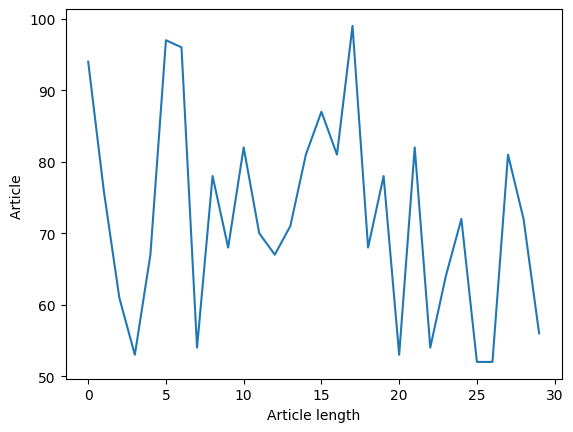

In [32]:
df['length'].plot()
plt.xlabel('Article length')  # Set the x-axis label
plt.ylabel('Article ')

## Box plot

Text(0.5, 0, 'Article length')

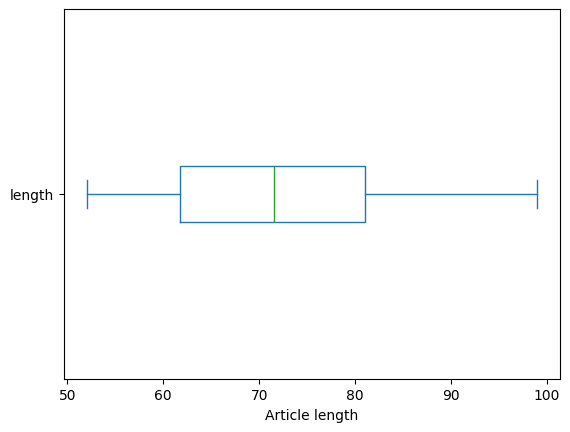

In [34]:
df['length'].plot(kind = 'box', vert = False)
plt.xlabel('Article length')

## Histogram

<Axes: ylabel='Frequency'>

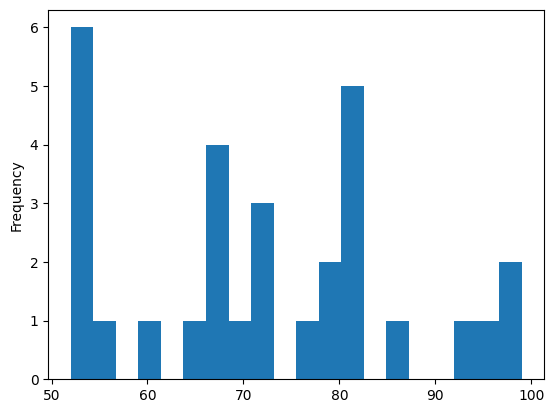

In [39]:
df['length'].plot(kind = 'hist', bins = 20)

## Regex

In [40]:
import regex as re
import nltk

In [44]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
stopwords = set(nltk.corpus.stopwords.words('english'))

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['ArticleTitle'].apply(prepare, pipeline=pipeline)

In [45]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Website,Article,ArticleTitle,ArticleText,Author(s),ArticleLink,length,tokens,num_tokens
25,Guardian,1,How the race for a Covid-19 vaccine is getting...,"To begin with, it felt like a sleek performanc...",Laura Spinney,https://www.theguardian.com/society/2020/aug/3...,52,"[race, covid-19, vaccine, getting, dirty]",5
26,Guardian,2,"Covid-19 vaccines: the contracts, prices and p...","Two US companies, Pfizer and Moderna, have rai...",Julia Kollewe,https://www.theguardian.com/world/2021/aug/11/...,52,"[covid-19, vaccines, contracts, prices, profits]",5
27,Guardian,3,Texas scientists’ new Covid-19 vaccine is chea...,A new Covid-19 vaccine is being developed by T...,Erum Salam,https://www.theguardian.com/us-news/2022/jan/1...,81,"[texas, scientists, new, covid-19, vaccine, ch...",9
28,Guardian,4,Patient removed from heart transplant list for...,A Boston-area hospital said it will not perfor...,Gloria Oladipo,https://www.theguardian.com/us-news/2022/jan/2...,72,"[patient, removed, heart, transplant, list, re...",8
29,Guardian,5,World leaders pledge €7.4bn to research Covid-...,"World leaders, with the notable exception of D...",Patrick Wintour,https://www.theguardian.com/world/2020/may/04/...,56,"[world, leaders, pledge, 4bn, research, covid-...",7


## Word frequency

In [46]:
from collections import Counter

In [47]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('covid-19', 20), ('vaccine', 19), ('booster', 7), ('fda', 5), ('covid', 5)]


In [48]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
covid-19,20
vaccine,19
booster,7
covid,5
fda,5
johnson,4
children,4
vaccines,4
world,3


In [49]:
freq_df.describe()

,freq
count,149.000000
mean,1.550336
std,2.273336
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,20.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

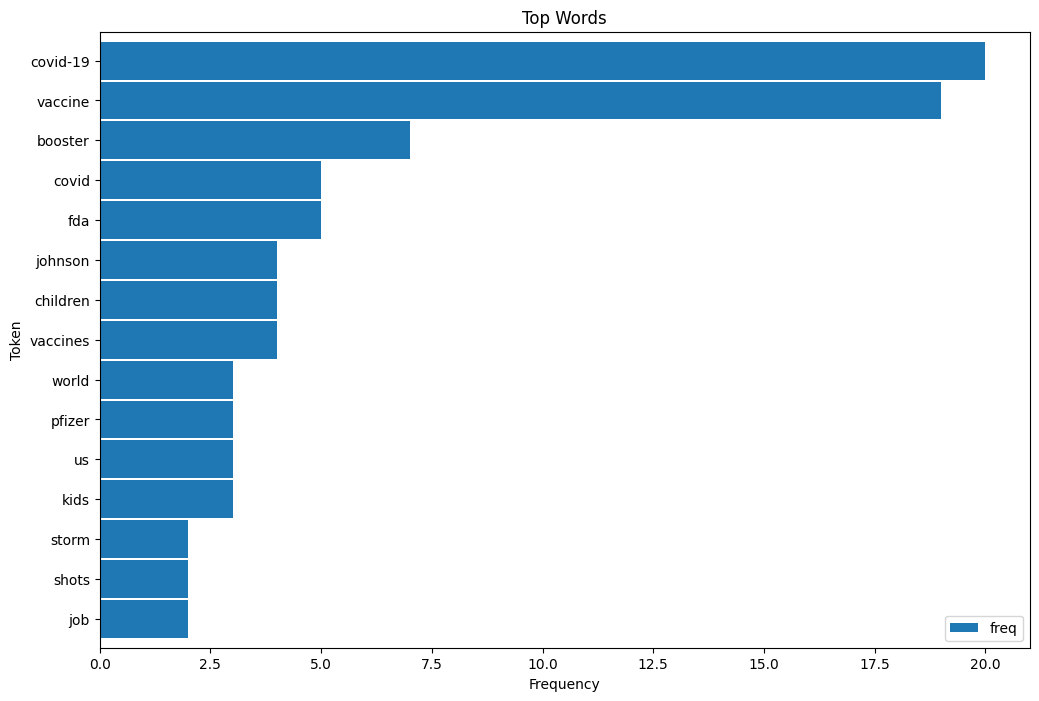

In [50]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')


## Word cloud

In [51]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

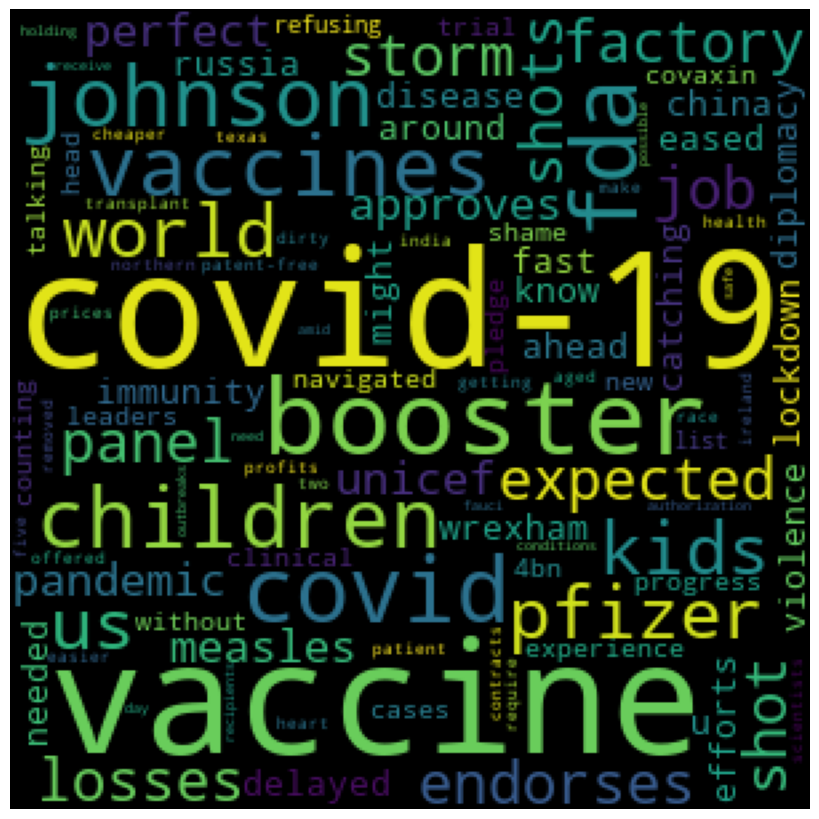

In [52]:
wc = WordCloud(background_color='black', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()